<a href="https://colab.research.google.com/github/Apollo9999/Wave2WEBHACK/blob/main/EDA/Harangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/My Drive/Wave2web/'

'2019-20 Agri excel.xlsx'
'District-wise Depth to water Level and Distribution of Percentage of Wells for the Period of Premonsoon, 2018 in Karnataka (2).xlsx'
'DIST-WISE FRQ TEALE OF MAY2019 for website.xlsx.xlsx'
 GroundwaterLevelSpatialDataProject-master.zip
 Harangi.csv
 Hemavathi.csv
 kabini.csv
'Kerala-District wise - Rainfall Data(2016-2020)'
 Kerala-Rainfall-Historical.csv
 KRS.csv
'_Preparation for Concept Note.docx'
'rainfall-data-for-karnataka_2008-2018 (4).xls'
'Rainfall data maharshtra.xlsx'
 rainfall_vs_ksr.csv
 Wave2Web_hack_ppt.pptx
 Wave2WebHack_Team_Arghyam.csv
 wavetowebEDA.ipynb


In [4]:
harangi = pd.read_csv('/content/gdrive/My Drive/Wave2web/Harangi.csv')

In [5]:
print("Harangi : ", harangi.shape)

Harangi :  (3321, 10)


In [6]:
harangi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3321 non-null   int64  
 1   RESERVOIR            3321 non-null   object 
 2   YEAR                 3321 non-null   int64  
 3   WEEK_NO              3321 non-null   int64  
 4   FLOW_DATE            3321 non-null   object 
 5   PRESENT_STORAGE_TMC  3321 non-null   float64
 6   RES_LEVEL_FT         3321 non-null   object 
 7   INFLOW_CUSECS        3321 non-null   object 
 8   OUTFLOW_CUECS        3321 non-null   object 
 9   UNIQUE_KEY           3321 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 259.6+ KB


In [8]:
harangi.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,37,Harangi,2011,1,2011-01-01,3.74,2835.90,142,0,HARANGI-2011-01-01
1,38,Harangi,2011,1,2011-01-02,3.76,2836.09,239,0,HARANGI-2011-01-02
2,39,Harangi,2011,1,2011-01-03,3.77,2836.22,166,0,HARANGI-2011-01-03
3,40,Harangi,2011,1,2011-01-04,3.78,2836.31,118,0,HARANGI-2011-01-04
4,41,Harangi,2011,1,2011-01-05,3.79,2836.41,130,0,HARANGI-2011-01-05


In [9]:
harangi.FLOW_DATE = pd.to_datetime(harangi.FLOW_DATE)

In [10]:
# convert object to numeric
harangi['INFLOW_CUSECS'] = pd.to_numeric(harangi.INFLOW_CUSECS, errors='coerce')

In [11]:
harangi['RES_LEVEL_FT'] = pd.to_numeric(harangi.RES_LEVEL_FT, errors='coerce')

In [12]:
harangi['OUTFLOW_CUECS'] = pd.to_numeric(harangi.OUTFLOW_CUECS, errors='coerce')

In [13]:
harangi.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,37,Harangi,2011,1,2011-01-01,3.74,2835.90,142.0,0.0,HARANGI-2011-01-01
1,38,Harangi,2011,1,2011-01-02,3.76,2836.09,239.0,0.0,HARANGI-2011-01-02
2,39,Harangi,2011,1,2011-01-03,3.77,2836.22,166.0,0.0,HARANGI-2011-01-03
3,40,Harangi,2011,1,2011-01-04,3.78,2836.31,118.0,0.0,HARANGI-2011-01-04
4,41,Harangi,2011,1,2011-01-05,3.79,2836.41,130.0,0.0,HARANGI-2011-01-05


In [14]:
harangi.describe()

,SL_NO,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
count,3321.000000,3321.000000,3321.000000,3321.000000,3320.000000,3320.000000,3320.000000
mean,22260.781391,2015.726287,27.664559,4.062620,2829.368407,1287.455087,1275.943905
std,12776.309856,2.827479,14.935104,2.591961,22.781351,3099.568440,2985.326549
min,37.000000,2010.000000,1.000000,0.000000,2773.830000,3.000000,0.000000
25%,11031.000000,2014.000000,15.000000,1.740000,2808.500000,67.750000,0.000000
50%,22562.000000,2016.000000,28.000000,3.430000,2831.950000,161.000000,80.000000
75%,33349.000000,2018.000000,41.000000,6.830000,2854.072500,1163.000000,1571.000000
max,43905.000000,2020.000000,52.000000,8.500000,2859.000000,77900.000000,78589.000000


In [16]:
harangi.loc[harangi['OUTFLOW_CUECS'] == 78589]


,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
1284,17626,Harangi,2018,33,2018-08-17,7.1,2854.87,77900.0,78589.0,HARANGI-2018-08-17


https://weather.com/en-IN/india/news/news/2020-01-08-top-5-biggest-floods-affect-india-2019

Floods at above date. but there is no proof that kabini outflow is that much.


In [18]:
fig = px.box(x = harangi["OUTFLOW_CUECS"] )
fig.show()

lot of outlier points are there.



2016    366
2019    365
2017    365
2015    365
2011    365
2018    365
2014    364
2020    333
2013    223
2012    208
2010      2
Name: YEAR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



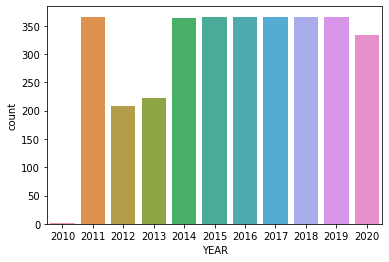

In [19]:
print(harangi["YEAR"].value_counts())
sns.countplot(harangi["YEAR"])


Only 2 months data and few less records for 2012 and 2013 for kabini

In [21]:
harangi_indexed = harangi.set_index('FLOW_DATE')

In [22]:
harangi_indexed.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
FLOW_DATE,,,,,,,,,
2011-01-01,37,Harangi,2011,1,3.74,2835.90,142.0,0.0,HARANGI-2011-01-01
2011-01-02,38,Harangi,2011,1,3.76,2836.09,239.0,0.0,HARANGI-2011-01-02
2011-01-03,39,Harangi,2011,1,3.77,2836.22,166.0,0.0,HARANGI-2011-01-03
2011-01-04,40,Harangi,2011,1,3.78,2836.31,118.0,0.0,HARANGI-2011-01-04
2011-01-05,41,Harangi,2011,1,3.79,2836.41,130.0,0.0,HARANGI-2011-01-05


In [23]:
fig = px.line(data_frame = harangi, x = 'FLOW_DATE', y='INFLOW_CUSECS')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [24]:
harangi_indexed['year'] = [x.year for x in harangi_indexed.index]

In [25]:
fig = px.line(data_frame=harangi_indexed, y='INFLOW_CUSECS', color='year')
fig.show()

In [26]:
weeklyharangi = harangi_indexed.groupby(['year','WEEK_NO']).mean()

In [27]:
weeklyharangi.shape

(476, 6)

In [28]:
fig = px.line(data_frame=weeklyharangi, y='INFLOW_CUSECS', color='YEAR')
fig.show()

In [29]:
fig = px.line(data_frame=weeklyharangi, y='OUTFLOW_CUECS', color='YEAR')
fig.show()

In [30]:
fig = px.line(data_frame=weeklyharangi, y='RES_LEVEL_FT', color='YEAR')
fig.show()

In [31]:
fig = px.line(data_frame=weeklyharangi, y='PRESENT_STORAGE_TMC', color='YEAR')
fig.show()